In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

df= pd.read_csv('Animation_Movies.csv')

numeric_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']


In [50]:
b_non_zero_mean = df['budget'][df['budget'] != 0].mean()

df['budget'].replace(0,b_non_zero_mean,inplace=True)


r_non_zero_mean = df['revenue'][df['revenue'] != 0].mean()

df['revenue'].replace(0,r_non_zero_mean,inplace=True)

v_non_zero_mean = df['vote_average'][df['vote_average'] != 0].mean()

df['vote_average'].replace(0,v_non_zero_mean,inplace=True)


v2_non_zero_mean = df['vote_count'][df['vote_count'] != 0].mean()

df['vote_count'].replace(0,v2_non_zero_mean,inplace=True)


df2 = pd.DataFrame(columns=['Name','Type','Range','Min','Max','Mean','Mode','Median'])

for i in range(len(numeric_columns)):
    df2.loc[i]={'Name':numeric_columns[i],'Type':df[numeric_columns[i]].dtype,'Range':f"{df[numeric_columns[i]].min()} :{df[numeric_columns[i]].max()} ",'Min':df[numeric_columns[i]].min(),'Max':df[numeric_columns[i]].max(),'Mean':df[numeric_columns[i]].mean(),'Mode':df[numeric_columns[i]].mode(),'Median':df[numeric_columns[i]].median()}


display(df2)

C:\Users\shaahin\AppData\Local\Temp\ipykernel_19688\3944470767.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget'].replace(0,b_non_zero_mean,inplace=True)
C:\Users\shaahin\AppData\Local\Temp\ipykernel_19688\3944470767.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Name     Type               Range  Min           Max          Mean  \
0        budget  float64   1.0 :260000000.0   1.0  2.600000e+08  1.866362e+07   
1       revenue  float64  1.0 :1450026933.0   1.0  1.450027e+09  8.799786e+07   
2       runtime    int64            0 :3720   0.0  3.720000e+03  2.090141e+01   
3  vote_average  float64          0.5 :10.0   0.5  1.000000e+01  6.376701e+00   
4    vote_count  float64       1.0 :19463.0   1.0  1.946300e+04  9.913720e+01   

                                               Mode        Median  
0    0    1.866362e+07
Name: budget, dtype: float64  1.866362e+07  
1   0    8.799786e+07
Name: revenue, dtype: float64  8.799786e+07  
2                0    0
Name: runtime, dtype: int64  7.000000e+00  
3  0    6.376701
Name: vote_average, dtype: float64  6.376701e+00  
4   0    99.137201
Name: vote_count, dtype: float64  9.913720e+01

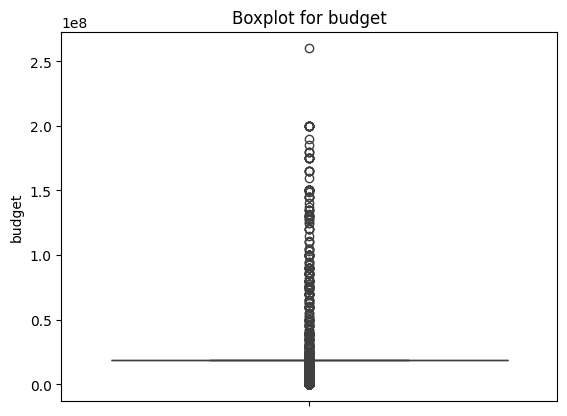

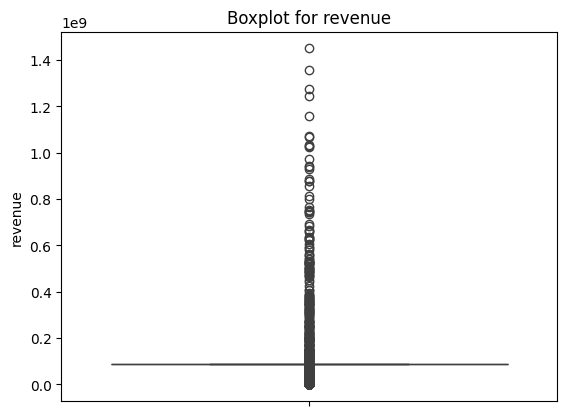

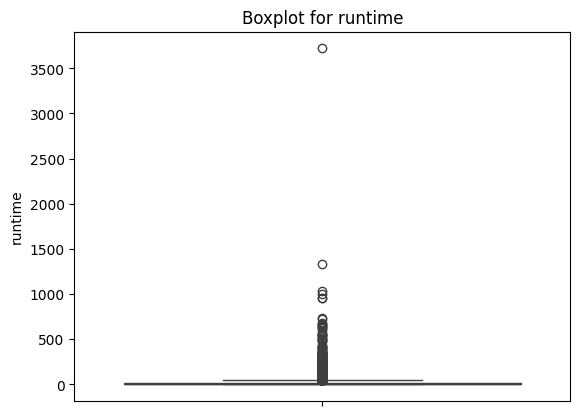

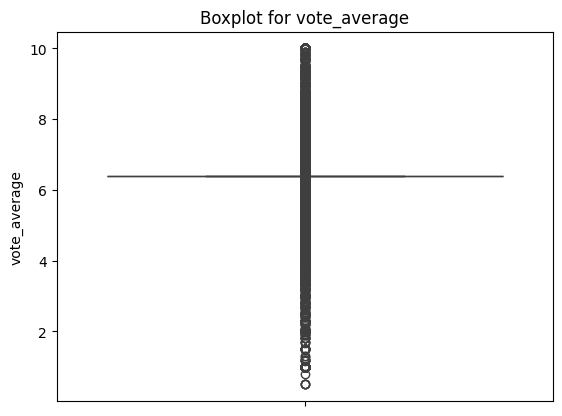

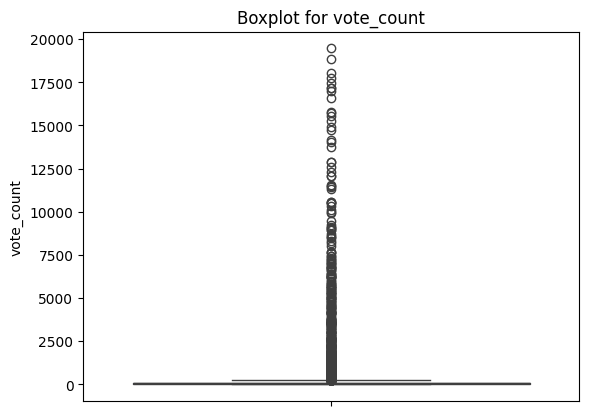

In [51]:
for column in numeric_columns:
    sns.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

از روی باکس پلات بنظر میرسد بودجه و درآمد رابطه مستقیم دارند

کمبود بودجه همواره باعث کمبود درآمد میشود ولی زیاد بودن آن لزوم باعث درآمد بیشتر نمیشود

In [52]:


# بارگذاری داده‌ها
# df = pd.read_csv('your_data.csv')

# مرحله ۱: بررسی مقادیر گم‌شده
missing_values = df[['revenue', 'budget', 'release_date']].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing values and their percentages:\n", missing_percentage)

# مرحله ۲: شناسایی داده‌های پرت
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

# شناسایی داده‌های پرت در revenue و budget
outliers_revenue = detect_outliers(df, 'revenue')
outliers_budget = detect_outliers(df, 'budget')

print("Outliers in revenue:\n")
display( outliers_revenue)
print("Outliers in budget:\n")
display( outliers_budget)

# مرحله ۳: بررسی ناسازگاری‌ها و خطاها در date_release
# چک می‌کنیم که تاریخ انتشار از زمان حال و یا زمان آینده نباشد
from datetime import datetime
today = datetime.today()

invalid_dates = df[pd.to_datetime(df['release_date'], errors='coerce') > today]
print("Invalid dates in date_release:\n", invalid_dates)

invalid_budget = df[df['budget'] < 0]
invalid_revenue = df[df['revenue'] < 0]
print(f"Invalid budget values:\n")
display(invalid_budget) 
print(f"Invalid revenue values:\n")
display(invalid_revenue)

# نمایش خلاصه‌ای از کیفیت داده‌ها
summary = {
    "missing_values": missing_percentage,
    "outliers_revenue": len(outliers_revenue),
    "outliers_budget": len(outliers_budget),
    "invalid_dates": len(invalid_dates),
    "invalid_budget": len(invalid_budget),
    "invalid_revenue": len(invalid_revenue),
}
print("Data quality summary:\n", summary)




inconsistent_budget_revenue = df[(df['budget'].isna()) & (~df['revenue'].isna())]
print(f"Inconsistent rows between budget and revenue:\n{inconsistent_budget_revenue}")


df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


df['release_year'] = df['release_date'].dt.year


decade_bins = pd.cut(df['release_year'], bins=np.arange(1900, 2030, 10))
decade_distribution = df.groupby(decade_bins).size()
print(f"Number of movies in each decade:\n{decade_distribution}")



valid_budget_ratio = df['budget'].notna().mean() * 100
valid_revenue_ratio = df['revenue'].notna().mean() * 100
valid_date_release_ratio = df['release_date'].notna().mean() * 100

print(f"Valid budget ratio: {valid_budget_ratio:.2f}%")
print(f"Valid revenue ratio: {valid_revenue_ratio:.2f}%")
print(f"Valid date_release ratio: {valid_date_release_ratio:.2f}%")

# پیشنهادات برای بهبود کیفیت داده‌ها:
# 1. پر کردن مقادیر گم‌شده با میانگین یا میانه‌ی داده‌ها برای ستون‌های budget و revenue.
# 2. استفاده از اطلاعات تاریخی معتبر برای پر کردن مقادیر گم‌شده در date_release.
# 3. حذف یا تصحیح مقادیر پرت (outliers) مانند مقادیر منفی در ستون‌های budget و revenue.


Missing values and their percentages:
 revenue         0.000000
budget          0.000000
release_date    4.113967
dtype: float64
Outliers in revenue:



id                             title  vote_average    vote_count  \
0      150540                        Inside Out      7.922000  19463.000000   
1       14160                                Up      7.949000  18857.000000   
2          12                      Finding Nemo      7.824000  18061.000000   
3      354912                              Coco      8.222000  17742.000000   
4       10681                            WALL·E      8.078000  17446.000000   
...       ...                               ...           ...           ...   
51192  646484                             HX-01      6.376701     99.137201   
51209  644920  Bulmaca Kulesi: Dev Kuşun Gizemi      6.376701     99.137201   
51451  642399                  Fear of the Moth      6.376701     99.137201   
51544  664389               The Secret Princess      6.376701     99.137201   
51573  663637              The Great Vairitosky      6.376701     99.137201   

         status release_date      revenue  runtime  adult  \
0      Released   2015-06-09  857611174.0       95  False   
1      Released   2009-05-28  735099082.0       96  False   
2      Released   2003-05-30  940335536.0      100  False   
3      Released   2017-10-27  800526015.0      105  False   
4      Released   2008-06-22  521311860.0       98  False   
...         ...          ...          ...      ...    ...   
51192  Released   2017-04-14      12000.0       37  False   
51209  Released   2019-10-15     149485.0        0  False   
51451  Released   2018-05-18          2.0        8  False   
51544  Released   2014-12-01     500000.0       94  False   
51573  Released   2014-09-11      30000.0       15  False   

                          backdrop_path  ...  original_language  \
0      /j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg  ...                 en   
1      /hGGC9gKo7CFE3fW07RA587e5kol.jpg  ...                 en   
2      /h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg  ...                 en   
3      /askg3SMvhqEl4OL52YuvdtY40Yb.jpg  ...                 en   
4      /fK5ssgvtI43z19FoWigdlqgpLRE.jpg  ...                 en   
...                                 ...  ...                ...   
51192  /gxBfMtkIleLXovWfEkD7rcaYx49.jpg  ...                 en   
51209                               NaN  ...                 tr   
51451                               NaN  ...                 en   
51544                               NaN  ...                 en   
51573  /v5ShWjgFdT1LpuYhxxcltrLkZqU.jpg  ...                 es   

                         original_title  \
0                            Inside Out   
1                                    Up   
2                          Finding Nemo   
3                                  Coco   
4                                WALL·E   
...                                 ...   
51192                             HX-01   
51209  Bulmaca Kulesi: Dev Kuşun Gizemi   
51451                  Fear of the Moth   
51544               The Secret Princess   
51573                El Gran Vairitosky   

                                                overview popularity  \
0      Growing up can be a bumpy road, and it's no ex...    107.292   
1      Carl Fredricksen spent his entire life dreamin...     90.968   
2      Nemo, an adventurous young clownfish, is unexp...     55.456   
3      Despite his family’s baffling generations-old ...    166.578   
4      What if mankind had to leave Earth and somebod...     58.517   
...                                                  ...        ...   
51192  HX-01 is an animated short film by hexeosis. A...      0.600   
51209                                                NaN      0.600   
51451  The girl is scared of a moth, so she tries to ...      0.600   
51544  A prince falls in love with a mysterious girl ...      0.600   
51573  Vairitosky is an immortal artist. His act cons...      0.600   

                            poster_path  \
0      /2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg   
1      /vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg   
2      /ggQ6o8X5984OCh3kZ

Outliers in budget:



id                  title  vote_average    vote_count  \
0      150540             Inside Out      7.922000  19463.000000   
1       14160                     Up      7.949000  18857.000000   
2          12           Finding Nemo      7.824000  18061.000000   
3      354912                   Coco      8.222000  17742.000000   
4       10681                 WALL·E      8.078000  17446.000000   
...       ...                    ...           ...           ...   
51711  666154                 Kayara      6.376701     99.137201   
51792  651483        Rite of Passage      6.376701     99.137201   
51899  656140  Broken Being: Prequel      6.376701     99.137201   
51931  657250                 Sirena      6.376701     99.137201   
51935  657512            The Longing      6.376701     99.137201   

              status release_date       revenue  runtime  adult  \
0           Released   2015-06-09  8.576112e+08       95  False   
1           Released   2009-05-28  7.350991e+08       96  False   
2           Released   2003-05-30  9.403355e+08      100  False   
3           Released   2017-10-27  8.005260e+08      105  False   
4           Released   2008-06-22  5.213119e+08       98  False   
...              ...          ...           ...      ...    ...   
51711  In Production          NaN  8.799786e+07        0  False   
51792       Released   2018-12-19  8.799786e+07        1  False   
51899       Released   2019-04-01  8.799786e+07       15  False   
51931       Released   2019-12-18  8.799786e+07        2  False   
51935       Released   2019-12-18  8.799786e+07        2  False   

                          backdrop_path  ...  original_language  \
0      /j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg  ...                 en   
1      /hGGC9gKo7CFE3fW07RA587e5kol.jpg  ...                 en   
2      /h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg  ...                 en   
3      /askg3SMvhqEl4OL52YuvdtY40Yb.jpg  ...                 en   
4      /fK5ssgvtI43z19FoWigdlqgpLRE.jpg  ...                 en   
...                                 ...  ...                ...   
51711  /hxnfEVqG5ycRcFV27ZjbgsEAnRZ.jpg  ...                 en   
51792                               NaN  ...                 en   
51899                               NaN  ...                 vi   
51931                               NaN  ...                 pt   
51935                               NaN  ...                 pt   

             original_title  \
0                Inside Out   
1                        Up   
2              Finding Nemo   
3                      Coco   
4                    WALL·E   
...                     ...   
51711                Kayara   
51792       Rite of Passage   
51899  Tan The: Tien Truyen   
51931                Sirena   
51935               A Falta   

                                                overview popularity  \
0      Growing up can be a bumpy road, and it's no ex...    107.292   
1      Carl Fredricksen spent his entire life dreamin...     90.968   
2      Nemo, an adventurous young clownfish, is unexp...     55.456   
3      Despite his family’s baffling generations-old ...    166.578   
4      What if mankind had to leave Earth and somebod...     58.517   
...                                                  ...        ...   
51711  A courageous and athletic teenager, Kayara dre...      0.600   
51792  And the beat goes on in the annals of high sch...      0.600   
51899  A man goes on a journey finding the literal Pa...      0.600   
51931  Abandon by her family for being different, Sir...      0.603   
51935  We follow the day of an elderly man,who seems ...      0.600   

                            poster_path  \
0      /2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg   
1      /vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg   
2      /ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg   
3      /gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg   
4      /hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg   
...                                 ...   
51711  /wsxHA6878H8JgGr7kmXGZ6TJUO6.jpg   
51792  /9pWZCL

Invalid dates in date_release:
             id                                              title  \
21305   947674                      Vale­mon: The Polar Bear King   
21637   936108                                    The Smurf Movie   
21792  1196264                                 A Figgly Christmas   
22557  1235336                            The Sensational Cat-Man   
23014   980432                    Untitled Fire Lord Zuko Project   
23015   980431  Avatar The Last Airbender: Echoes and Aftershocks   
24557  1208869                            Who Shrunk Daniel Funk?   
26142  1215638                                  Checkered Ninja 3   
26469  1201768                         On The Edge: Donnie Dares!   
27170  1218471                           The Crypto: Dark Justice   
28479  1084728                                   Astérix & Obélix   
29624  1064486                                  Memoir of a Snail   
30350  1112431                                      Twilight Park   
30

Empty DataFrame
Columns: [id, title, vote_average, vote_count, status, release_date, revenue, runtime, adult, backdrop_path, budget, homepage, imdb_id, original_language, original_title, overview, popularity, poster_path, tagline, genres, production_companies, production_countries, spoken_languages]
Index: []

[0 rows x 23 columns]

Invalid revenue values:



Empty DataFrame
Columns: [id, title, vote_average, vote_count, status, release_date, revenue, runtime, adult, backdrop_path, budget, homepage, imdb_id, original_language, original_title, overview, popularity, poster_path, tagline, genres, production_companies, production_countries, spoken_languages]
Index: []

[0 rows x 23 columns]

Data quality summary:
 {'missing_values': revenue         0.000000
budget          0.000000
release_date    4.113967
dtype: float64, 'outliers_revenue': 1100, 'outliers_budget': 1603, 'invalid_dates': 21, 'invalid_budget': 0, 'invalid_revenue': 0}
Inconsistent rows between budget and revenue:
Empty DataFrame
Columns: [id, title, vote_average, vote_count, status, release_date, revenue, runtime, adult, backdrop_path, budget, homepage, imdb_id, original_language, original_title, overview, popularity, poster_path, tagline, genres, production_companies, production_countries, spoken_languages]
Index: []

[0 rows x 23 columns]
Number of movies in each decade:
release_year
(1900, 1910]       68
(1910, 1920]      314
(1920, 1930]     1098
(1930, 1940]     2155
(1940, 1950]     1853
(1950, 1960]     1928
(1960, 1970]     2226
(1970, 1980]     2709
(1980, 1990]     3696
(1990, 2000]     4307
(2000, 2010]     7329
(2010, 2020]    15092
dtype: int64
Valid budget ratio: 100.00%
Valid revenue ratio: 

C:\Users\shaahin\AppData\Local\Temp\ipykernel_19688\479150509.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_distribution = df.groupby(decade_bins).size()


In [53]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)



df_clean = df


df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].median())



df_clean.to_csv('cleaned_animation_dataset.csv', index=False)




nltk.download('stopwords')
nltk.download('wordnet')


imputer_mean = SimpleImputer(strategy='mean')
df_clean['vote_average'] = imputer_mean.fit_transform(df_clean[['vote_average']])

imputer_median = SimpleImputer(strategy='mean')
df_clean['runtime'] = imputer_median.fit_transform(df_clean[['runtime']])

imputer_mode = SimpleImputer(strategy='mean')
df_clean['popularity'] = imputer_mode.fit_transform(df_clean[['popularity']])

###########################################################################################
most_frequent_date = df['release_date'].mode()[0]

df['release_date'].fillna(most_frequent_date, inplace=True)

most_frequent_genre = df['genres'].mode()[0]


df['genres'].fillna(most_frequent_genre, inplace=True)



##########################################################################################
scaler = MinMaxScaler()
df_clean[['vote_average', 'runtime', 'popularity']] = scaler.fit_transform(df_clean[['vote_average', 'runtime', 'popularity']])

def remove_outliers(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df_clean[~((df_clean[column] < (Q1 - 1.5 * IQR)) | (df_clean[column] > (Q3 + 1.5 * IQR)))]
    return df_clean

df_clean = remove_outliers(df_clean, 'budget')
df_clean = remove_outliers(df_clean, 'revenue')

###########################################################################################################################################

df_clean['profit_ratio'] = df_clean['revenue'] / df_clean['budget']


df_clean['release_year'] = pd.to_datetime(df_clean['release_date']).dt.year
df_clean['release_season'] = pd.to_datetime(df_clean['release_date']).dt.month % 12 // 3 + 1

#matni be adadi
df_clean['genre_encoded'] = LabelEncoder().fit_transform(df_clean['genres'])

#adadi be matni

df_clean['runtime_category'] = pd.cut(df_clean['runtime'], bins=[0, 40,80, 120, 160,200], labels=['Very Short', 'Short Feature', 'Standard Feature', 'Long Feature','Epic'])


stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    words = [ps.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


df_clean['overview'] = df_clean['overview'].astype(str)
df_clean['overview_processed'] = df_clean['overview'].apply(preprocess_text)

###################################################################################################
# content_features = ['genre_encoded', 'release_year', 'runtime']
# kmeans = KMeans(n_clusters=5, random_state=42)
# df_clean['content_cluster'] = kmeans.fit_predict(df_clean[content_features])


# time_features = ['release_year']
# kmeans_time = KMeans(n_clusters=5, random_state=42)
# df_clean['time_cluster'] = kmeans_time.fit_predict(df_clean[time_features])


df_clean['success'] = np.where((df_clean['budget'] < df_clean['revenue']) & (df_clean['popularity'] > df_clean['popularity'].median()), 1, 0)


display(df_clean.head())


Missing Data:
 id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
release_year             2137
dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaahin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaahin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\shaahin\AppData\Local\Temp\ipykernel_19688\1157656038.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_date'].fillna(most_frequent_date, inplace=True)
C:\Users\shaahin\AppData\Local\Temp\

id                            title  vote_average  vote_count  \
131    9732  The Lion King II: Simba's Pride      0.678000      4130.0   
140    8965          Atlantis: Milo's Return      0.614105      3728.0   
151  508965                            Klaus      0.815789      3542.0   
173   11621                      Porco Rosso      0.767053      2922.0   
211   12242                         Mulan II      0.629158      2175.0   

       status release_date       revenue   runtime  adult  \
131  Released   1998-10-24  8.799786e+07  0.021774  False   
140  Released   2003-02-25  8.799786e+07  0.021505  False   
151  Released   2019-11-08  8.799786e+07  0.025806  False   
173  Released   1992-07-18  8.799786e+07  0.025269  False   
211  Released   2004-11-03  8.799786e+07  0.021237  False   

                        backdrop_path  ...  \
131  /vyOFlV1afDHb9MMwJVyON4qXbvC.jpg  ...   
140   /GDTwA5FBvVUOjCGKoNDMflbs3Z.jpg  ...   
151  /2u1YG0pgm5bIOXO2OVWLNdMl23f.jpg  ...   
173  /dalc1aMjUNIvTOVt5ZHt2zv6cm0.jpg  ...   
211   /2Zv86BI4QqztR19fwFErXyr59h.jpg  ...   

                                  production_companies  \
131  Disney Television Animation, DisneyToon Studio...   
140                        Disney Television Animation   
151                        Atresmedia, The SPA Studios   
173  Studio Ghibli, Walt Disney Studios Home Entert...   
211           Walt Disney Pictures, DisneyToon Studios   

         production_countries        spoken_languages release_year  \
131  United States of America                 English         1998   
140  United States of America                 English         2003   
151                     Spain  English, Northern Sami         2019   
173                     Japan                Japanese         1992   
211  United States of America                 English         2004   

    profit_ratio release_season  genre_encoded runtime_category  \
131     4.714939              4           1734       Very Short   
140     4.714939              1           1934       Very Short   
151     4.714939              4            965       Very Short   
173     4.714939              3           1825       Very Short   
211     4.714939              4            679       Very Short   

                                    overview_processed success  
131  circl life continu simba, fulli grown right pl...       1  
140  milo kida reunit friend investig strang occur ...       1  
151  jesper distinguish postal academy' worst stude...       1  
173  itali 1930s, sky pirat biplan terror wealthi c...       1  
211  fa mulan get surpris young life love, captain ...       1  

[5 rows x 30 columns]

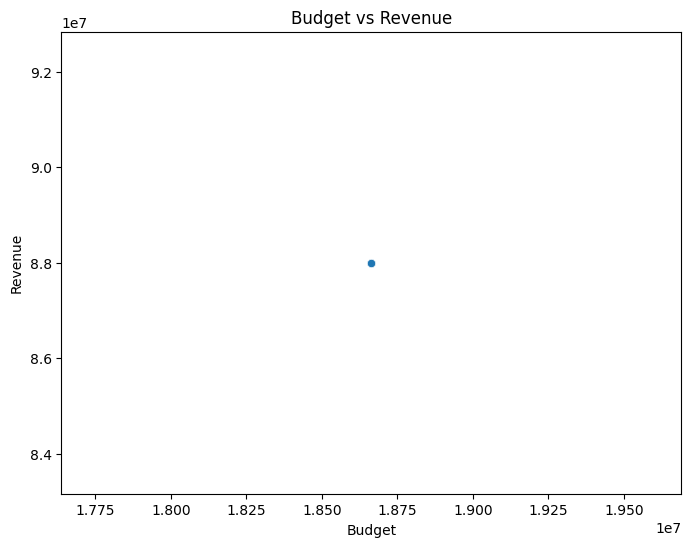

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=df_clean)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()



In [55]:
correlation = df_clean['budget'].corr(df_clean['revenue'])
print(f'Correlation between Budget and Revenue: {correlation}')

Correlation between Budget and Revenue: -1.0


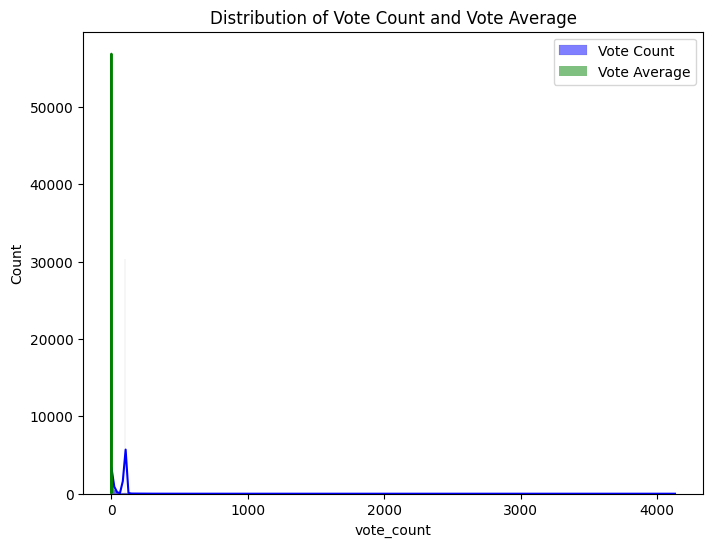

In [56]:
plt.figure(figsize=(8,6))
sns.histplot(df_clean['vote_count'], kde=True, color='blue', label='Vote Count')
sns.histplot(df_clean['vote_average'], kde=True, color='green', label='Vote Average')
plt.legend()
plt.title('Distribution of Vote Count and Vote Average')
plt.show()

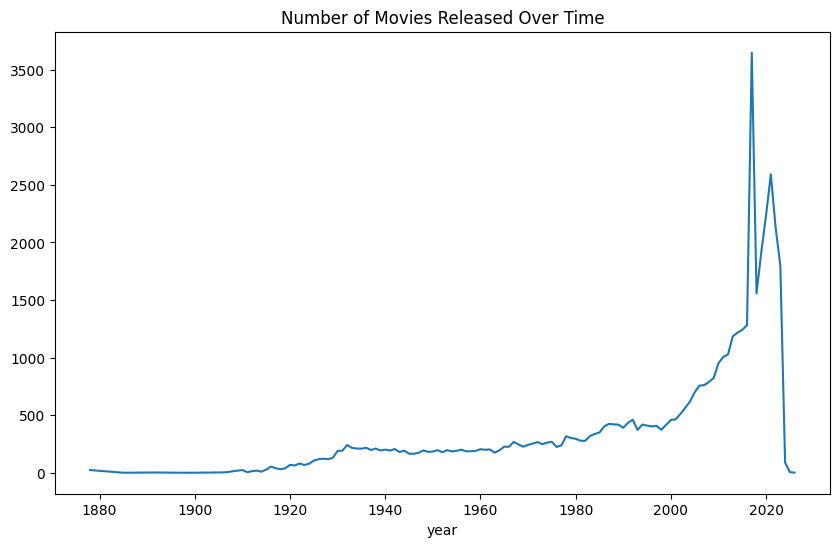

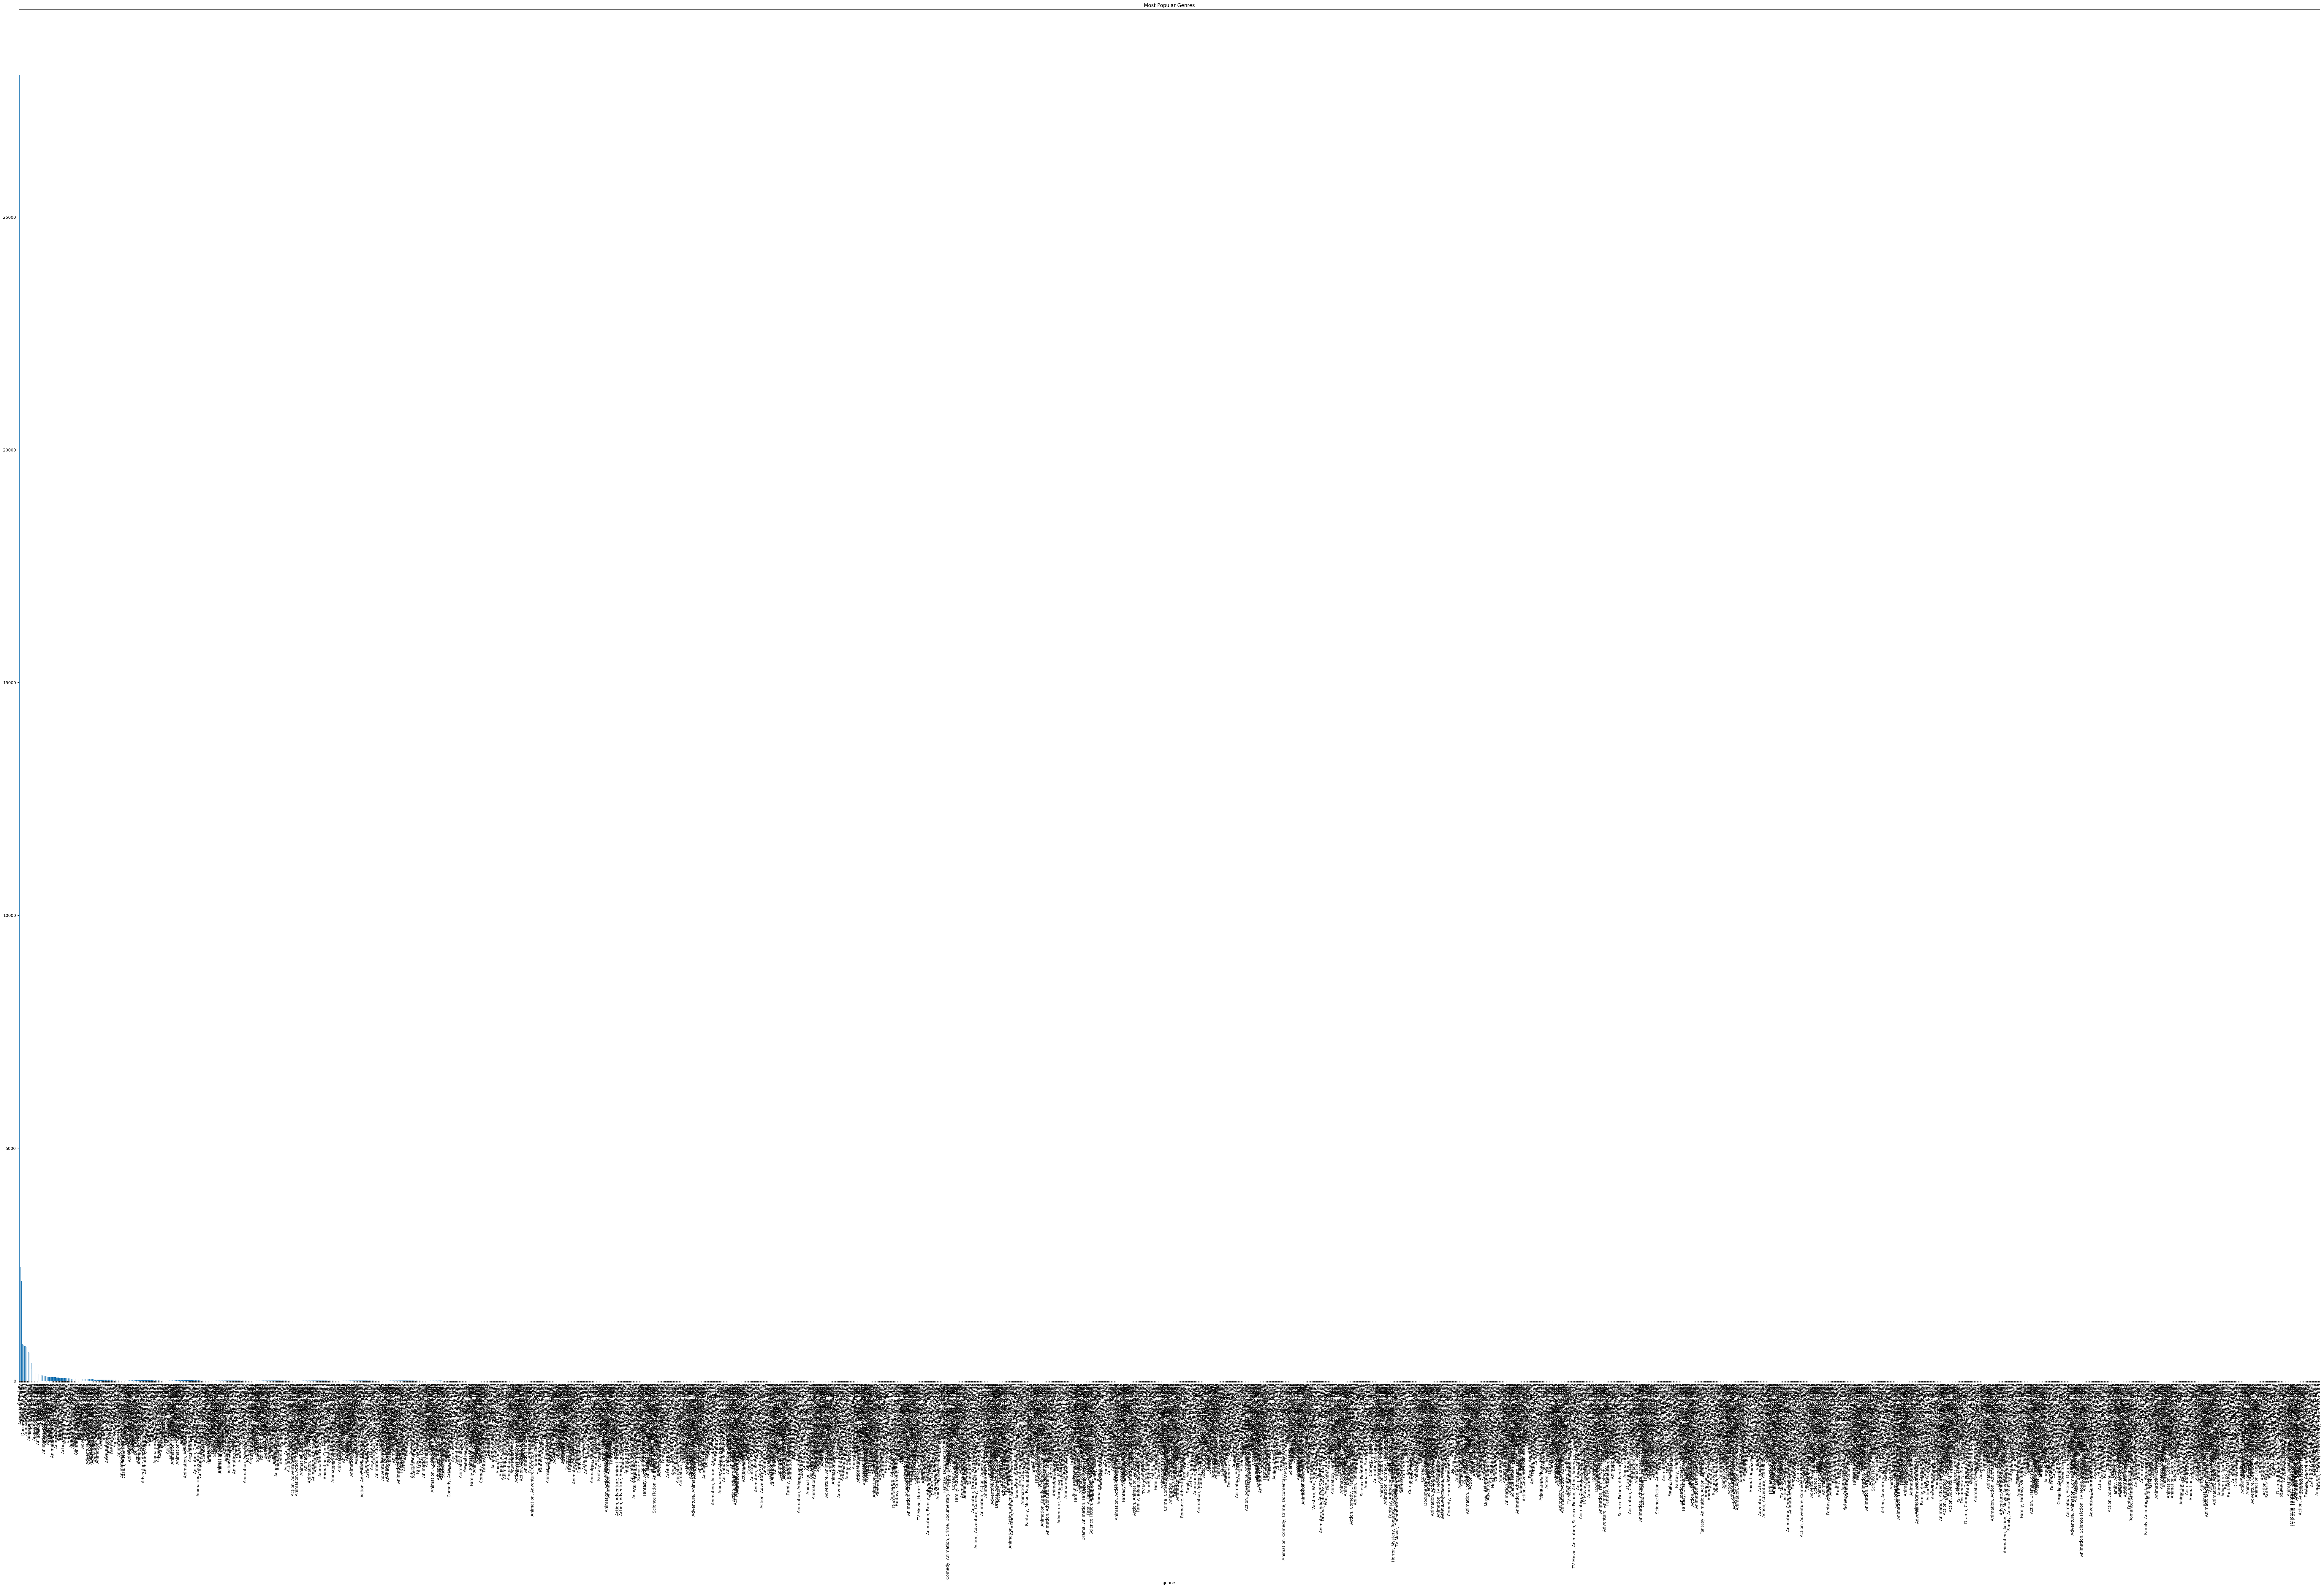

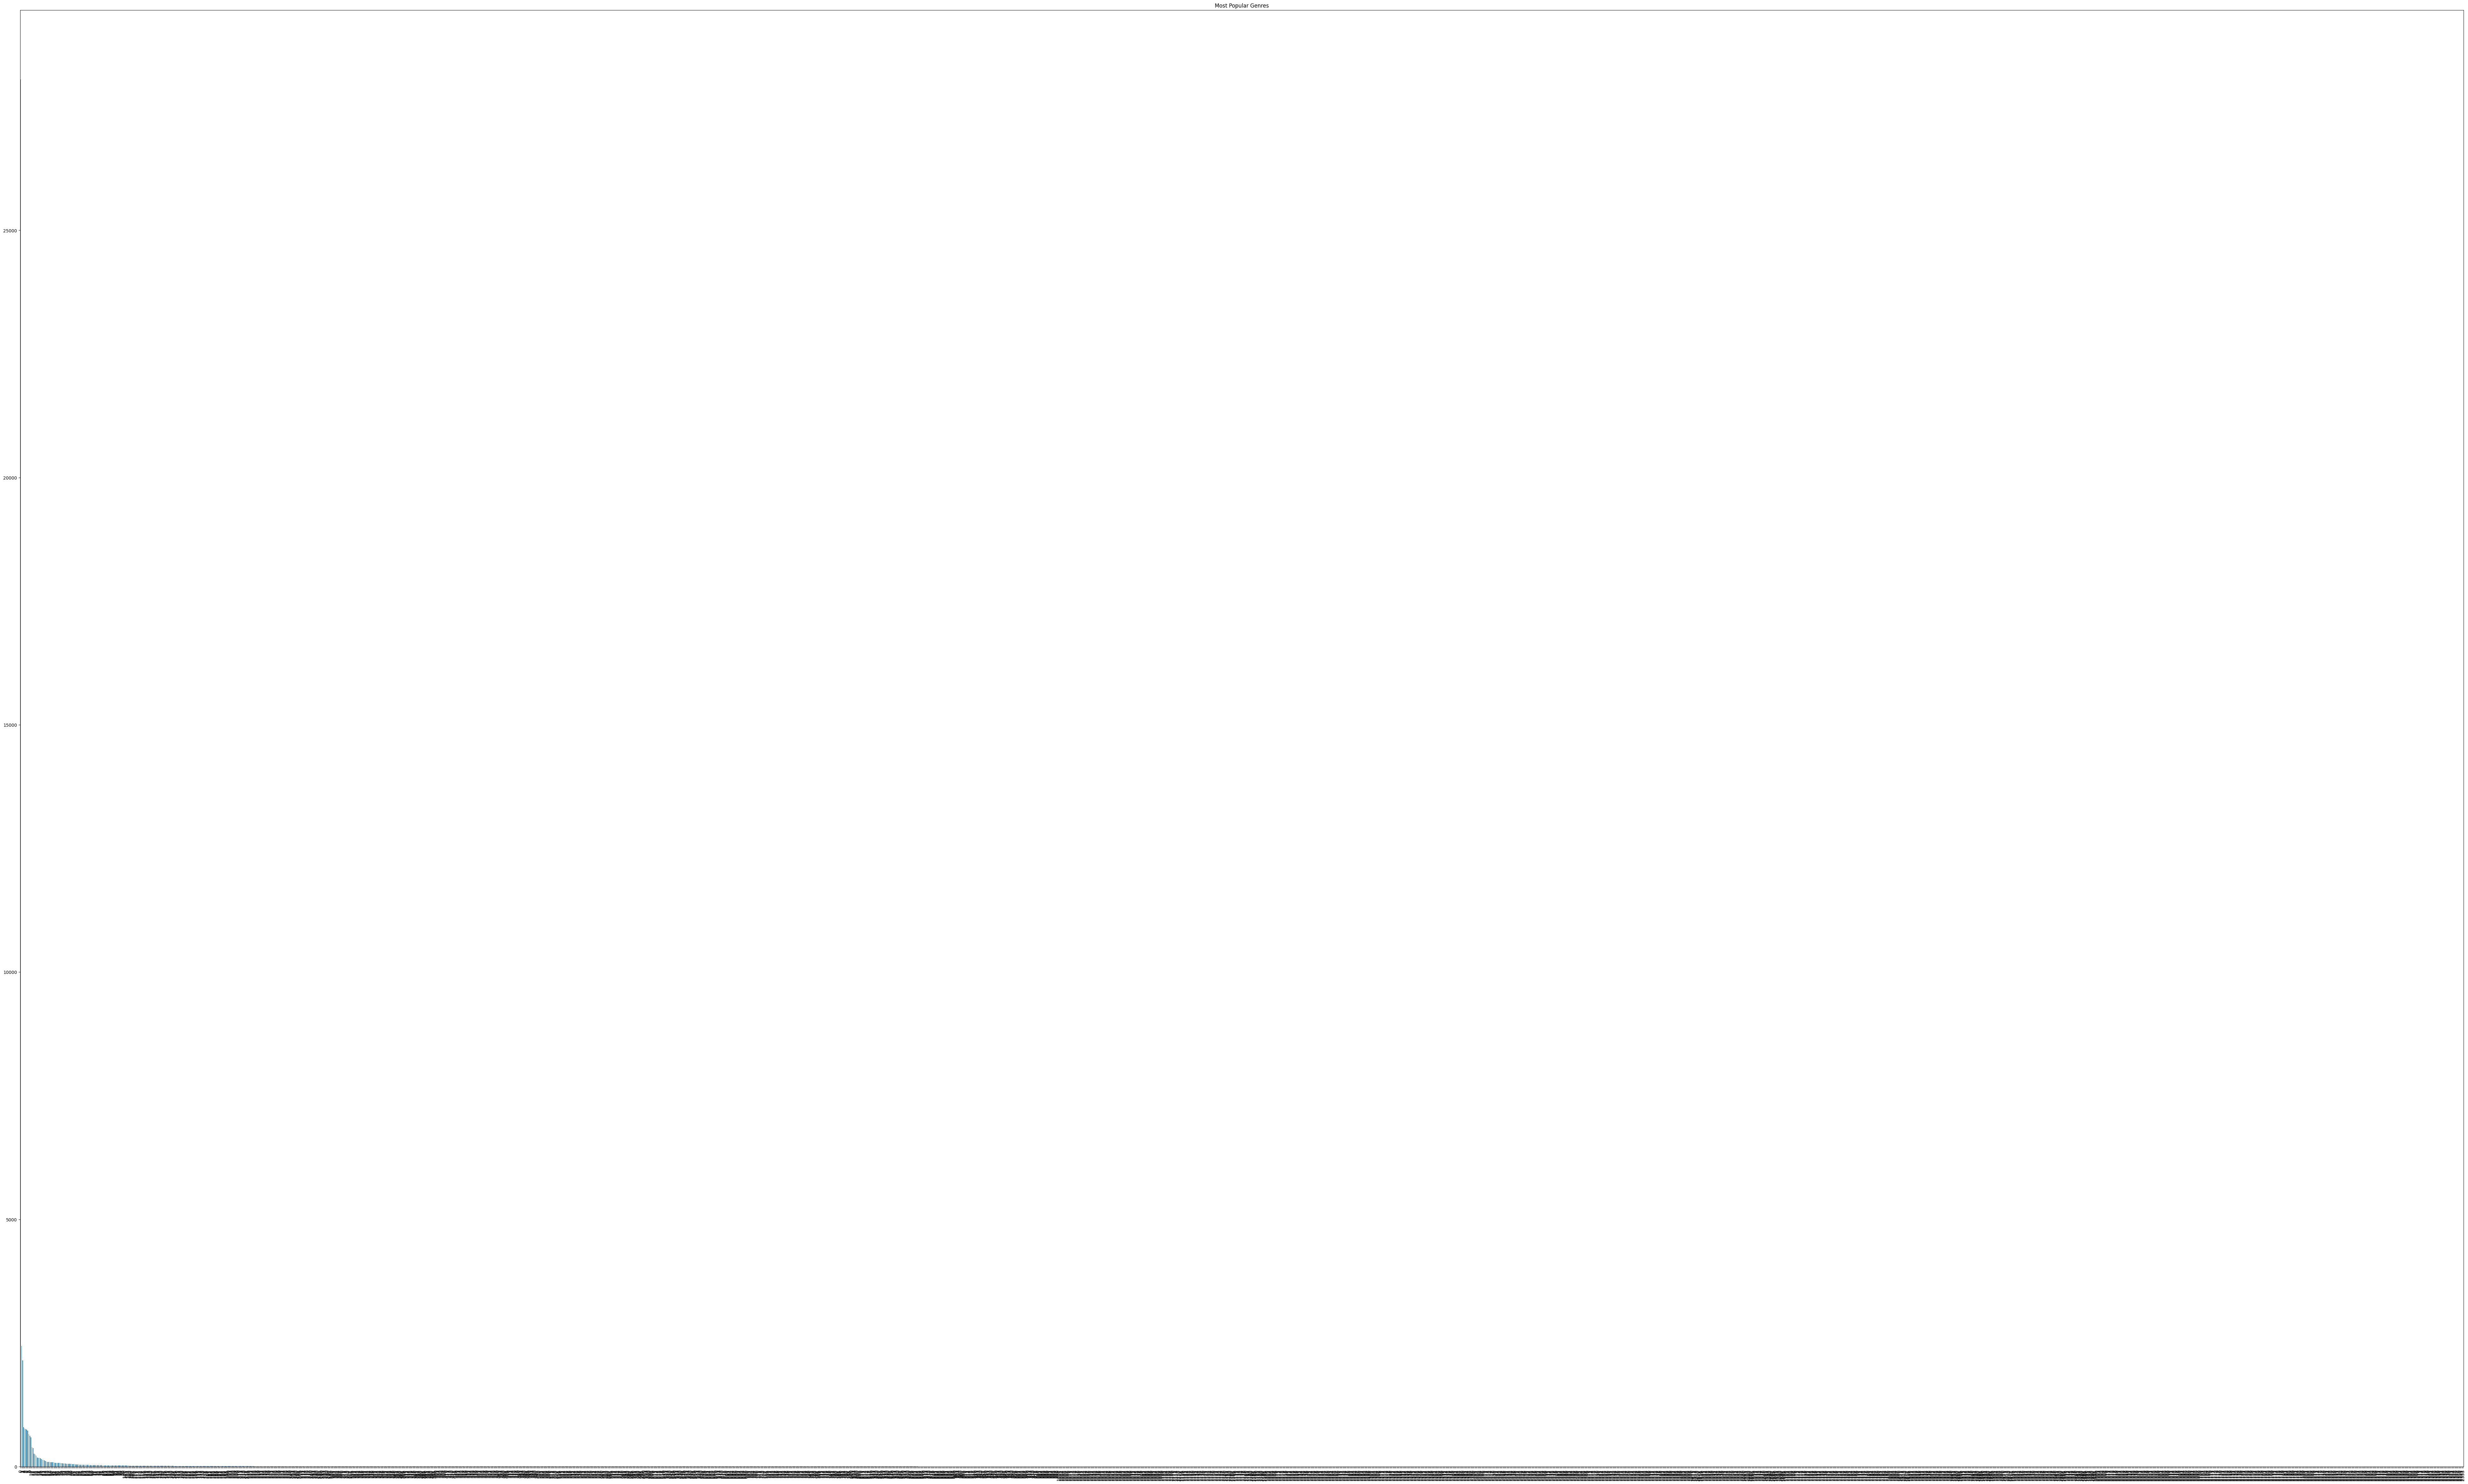

Top Genres by Revenue:
 genres
Animation, Family, Comedy, Fantasy, Adventure            9.287608e+08
Animation, Family, Adventure, Drama, Comedy              8.576112e+08
Family, Animation, Fantasy, Music, Comedy, Adventure     8.005260e+08
Animation, Family, Adventure, Fantasy, Comedy            7.858155e+08
Comedy, Adventure, Fantasy, Animation, Family            7.526009e+08
Adventure, Family, Animation, Action, Comedy             6.578278e+08
Fantasy, Action, Adventure, Animation, Comedy, Family    6.215375e+08
Animation, Adventure, Family, Fantasy, Comedy, Action    5.872047e+08
Action, Animation, Comedy, Family, Adventure             5.597752e+08
Animation, Adventure, Comedy, Family, Action, Fantasy    5.389832e+08
Name: revenue, dtype: float64
Top Genres by Vote Average:
 genres
Animation, Family, TV Movie, Adventure, Comedy                     1.0
Action, Animation, Adventure, Fantasy, Science Fiction, Mystery    1.0
Animation, Science Fiction, Drama, Romance, Fantasy          

In [ ]:
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')
df_clean['year'] =df_clean['release_date'].dt.year

movies_per_year = df_clean.groupby('year').size()
movies_per_year.plot(kind='line', figsize=(10,6), title='Number of Movies Released Over Time')
plt.show()



genres_count = df_clean['genres'].str.split('|').explode().value_counts()

genres_count.plot(kind='bar', figsize=(100,60), title='Most Popular Genres')
plt.show()

zero_counts = genres_count[genres_count!= 0].reset_index(drop=True)

zero_counts.plot(kind='bar', figsize=(50,20), title='Most Popular Genres')
plt.show()

top_revenue_genres = df.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)
top_vote_genres = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(10)

print("Top Genres by Revenue:\n", top_revenue_genres)
print("Top Genres by Vote Average:\n", top_vote_genres)

In [58]:



high_rating_threshold = 7.5
high_rating_movies = df_clean[df_clean['vote_average'] >= high_rating_threshold]
top_companies = high_rating_movies['production_companies'].value_counts()


high_rating_success = high_rating_movies[['title', 'popularity', 'vote_average', 'revenue']]


adult_movies = df_clean[df_clean['adult'] == True]
non_adult_movies = df_clean[df_clean['adult'] == False]

adult_success = adult_movies[['vote_average', 'revenue', 'popularity']].mean()
non_adult_success = non_adult_movies[['vote_average', 'revenue', 'popularity']].mean()


df_clean['revenue_budget_ratio'] = df_clean['revenue'] / df_clean['budget']
financial_success = df_clean.sort_values(by='revenue_budget_ratio', ascending=False)


language_counts = df_clean['spoken_languages'].value_counts()


print("Top Companies with High Rating Movies:")
print(top_companies)

print("\nSuccess Metrics for High Rating Movies:")
print(high_rating_success)

print("\nComparison of Adult vs. Non-Adult Movies (Mean Scores):")
print("Adult Movies:", adult_success)
print("Non-Adult Movies:", non_adult_success)

print("\nFinancial Success (Revenue to Budget Ratio):")
print(financial_success[['title', 'revenue_budget_ratio']])

print("\nMost Common Languages in Movies:")
print(language_counts)


Top Companies with High Rating Movies:
Series([], Name: count, dtype: int64)

Success Metrics for High Rating Movies:
Empty DataFrame
Columns: [title, popularity, vote_average, revenue]
Index: []

Comparison of Adult vs. Non-Adult Movies (Mean Scores):
Adult Movies: vote_average    5.944124e-01
revenue         8.799786e+07
popularity      1.438377e-03
dtype: float64
Non-Adult Movies: vote_average    6.174616e-01
revenue         8.799786e+07
popularity      1.388742e-03
dtype: float64

Financial Success (Revenue to Budget Ratio):
                                                   title  revenue_budget_ratio
131                      The Lion King II: Simba's Pride              4.714939
35130                                   Wish on the Moon              4.714939
35106                                                Fry              4.714939
35107                                              Heave              4.714939
35108                                      Hidden Heroes              